In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
sales=pd.read_csv("BMW sales data (2010-2024) (1).csv")

In [6]:
sales

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


In [7]:
sales.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [9]:
sales.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

In [10]:
sales.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [11]:
current_year = 2026 
sales['Car_Age'] = current_year - sales['Year']

In [12]:
model_avg_price = sales.groupby('Model')['Price_USD'].transform('mean')

In [13]:
sales['Price_vs_Model_Avg'] = sales['Price_USD'] - model_avg_price

In [14]:
sales.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Car_Age,Price_vs_Model_Avg
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,10,23452.155923
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,13,3852.729049
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,4,37977.155923
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,2,-14045.616856
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,6,-25672.196742


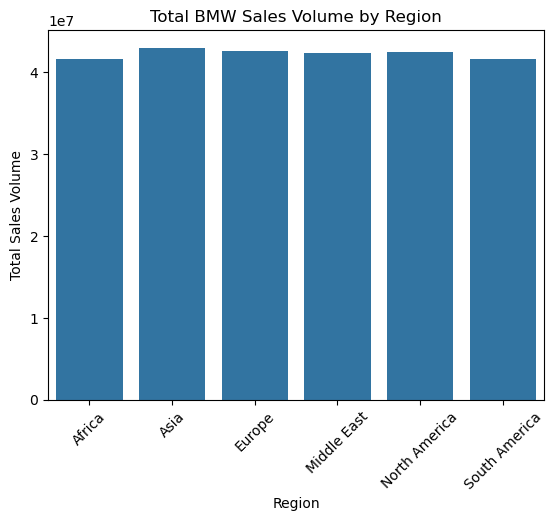

In [15]:
#which region had the most sales?
regional_sales = sales.groupby('Region')['Sales_Volume'].sum().reset_index()
sns.barplot(x='Region', y='Sales_Volume', data=regional_sales)
plt.title('Total BMW Sales Volume by Region')
plt.ylabel('Total Sales Volume')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

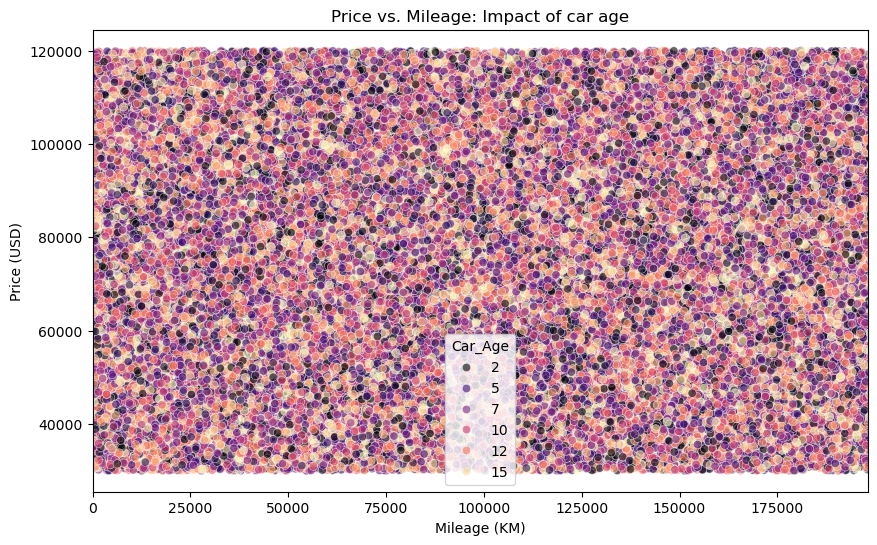

In [16]:
#How does mileage affect price?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage_KM', y='Price_USD', data=sales, hue='Car_Age',palette='magma', alpha=0.6)
plt.title('Price vs. Mileage: Impact of car age')
plt.xlabel('Mileage (KM)')
plt.ylabel('Price (USD)')
plt.xlim(0, sales['Mileage_KM'].quantile(0.99))
plt.show()

In [17]:
#What is the trend of market share of electric/hybrid models?
sales['Is_Electric']=sales['Fuel_Type'].apply(lambda x: 1 if x in ['Electric', 'Hybrid'] else 0)
yearly_counts = sales.groupby('Year')['Is_Electric'].agg(Total_Electric_Sales='sum',Total_All_Sales='count').reset_index()
yearly_counts

,Year,Total_Electric_Sales,Total_All_Sales
0,2010,1663,3330
1,2011,1678,3278
2,2012,1705,3332
3,2013,1664,3326
4,2014,1678,3350
5,2015,1695,3358
6,2016,1663,3365
7,2017,1644,3290
8,2018,1662,3278
9,2019,1715,3392


In [27]:
sales.columns = sales.columns.str.lower()

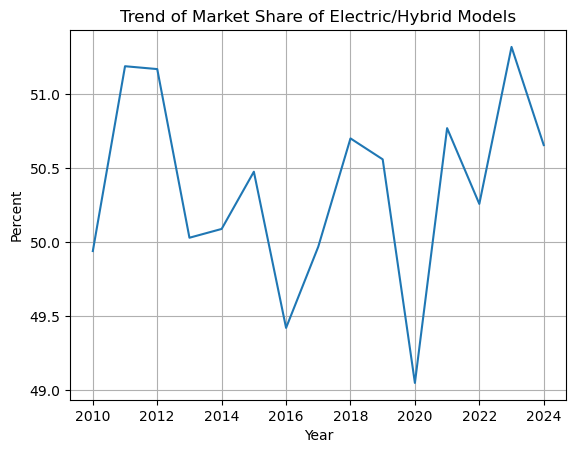

In [28]:
yearly_counts['Electric_Share_Percent'] = ((yearly_counts['Total_Electric_Sales'] / yearly_counts['Total_All_Sales']) * 100)
sns.lineplot(x='Year',y='Electric_Share_Percent',data=yearly_counts)
plt.title('Trend of Market Share of Electric/Hybrid Models')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.grid(True)
plt.show()

In [29]:
sales.to_csv('BMW_Sales_Augmented.csv', index=False)

In [30]:
pip install psycopg2-binary sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [31]:
from sqlalchemy import create_engine

username = "postgres"
password = "root"
host = "localhost"
port = "5432"
database = "BMW_SALES"

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

table_name = "bmw_s"
sales.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")

Data successfully loaded into table 'bmw_s' in database 'BMW_SALES'.
